# Example: Fit ExponentialNHPP with ss1a.csv

This notebook loads the bundled MUSA ss1a dataset and fits an exponential NHPP model.

In [1]:
# initialize
import importlib.resources as resources

import pandas as pd
import pysrat as srat

In [2]:
data_path = resources.files("pysrat").joinpath("datasets/musa/ss1a.csv")
df = pd.read_csv(data_path)

data = srat.NHPPData.from_intervals(
    time=df["time"].to_numpy(dtype=float),
    fault=df["fault"].to_numpy(dtype=float),
    type=df["indicator"].to_numpy(dtype=int),
)

In [3]:
data_path = resources.files("pysrat").joinpath("datasets/musa/sys17g.csv")
df = pd.read_csv(data_path)

data = srat.NHPPData.from_counts(
    fault=df["fault"].to_numpy(dtype=float))

In [4]:
models = {
    "Exponential": srat.ExponentialNHPP(),
    "Gamma": srat.GammaNHPP(),
    "Pareto2": srat.Pareto2NHPP(),
    "TruncatedNormal": srat.TruncatedNormalNHPP(),
    "LogNormal": srat.LogNormalNHPP(),
    "TruncatedLogistic": srat.TruncatedLogisticNHPP(),
    "LogLogistic": srat.LogLogisticNHPP(),
    "TruncatedExtremeValueMax": srat.TruncatedExtremeValueMaxNHPP(),
    "LogExtremeValueMax": srat.LogExtremeValueMaxNHPP(),
    "TruncatedExtremeValueMin": srat.TruncatedExtremeValueMinNHPP(),
    "LogExtremeValueMin": srat.LogExtremeValueMinNHPP(),
}
for model in models.values():
    model.fit(data)

/Users/okamu/Documents/pysrat/.venv/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


<Axes: xlabel='time', ylabel='# of faults'>

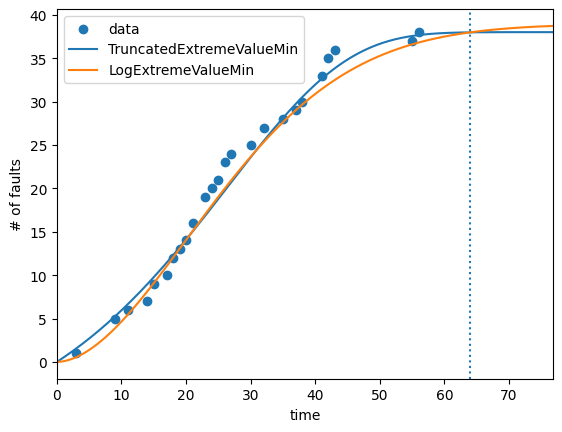

In [5]:
srat.plot_mvf(data, {k: models[k] for k in ["TruncatedExtremeValueMin", "LogExtremeValueMin"]})

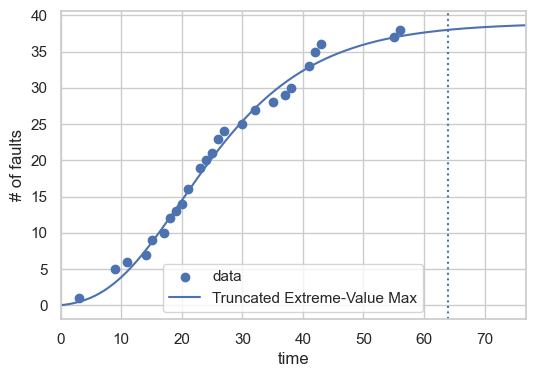

In [21]:
# seaborn example
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(6,4))
srat.plot_mvf(data, {"Truncated Extreme-Value Max": models["TruncatedExtremeValueMax"]}, ax=ax)
plt.show()
